In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('student_bookings.csv')
df

,booking_id,student_id,property_id,country,booking_date,monthly_rent_usd,booking_status,referral_source,move_in_date
0,1,1102,232,Germany,2024-10-24,1931.99,Cancelled,Other,2024-12-02
1,2,1348,264,Australia,2023-04-24,1186.99,Cancelled,Other,2023-06-27
2,3,1270,217,Canada,2024-07-31,1342.00,Confirmed,Referral,2024-09-18
3,4,1106,295,USA,2023-12-27,1411.00,Cancelled,Instagram,2024-02-15
4,5,1071,248,Australia,2023-12-07,797.99,Confirmed,Referral,2024-02-21
...,...,...,...,...,...,...,...,...,...
795,796,1241,206,Canada,2023-03-04,425.00,Confirmed,Instagram,2023-03-22
796,797,1250,208,Australia,2023-03-14,1448.00,Cancelled,Instagram,2023-05-11
797,798,1364,247,Germany,2024-09-27,1817.00,Cancelled,Other,2024-12-25
798,799,1004,271,Canada,2024-01-10,906.50,Cancelled,Other,2024-02-04


In [10]:
df_filtered = df[df['booking_status'] != 'Cancelled']
avg_rent_referral = df_filtered.groupby('referral_source')['monthly_rent_usd'].mean().reset_index()
avg_rent_referral

,referral_source,monthly_rent_usd
0,Google,1327.233664
1,Instagram,1192.483806
2,Other,1209.137181
3,Referral,1231.831062


In [20]:
df['booking_date'] = pd.to_datetime(df['booking_date'])
df['move_in_date'] = pd.to_datetime(df['move_in_date'])
df['days_to_move_in'] = (df['move_in_date'] - df['booking_date']).dt.days
median_days_country = df.groupby('country')['days_to_move_in'].median().reset_index()
median_days_country

,country,days_to_move_in
0,Australia,44.0
1,Canada,44.0
2,Germany,51.0
3,UK,47.0
4,USA,49.5


In [22]:
highest_revenue_property_Aus = (
    df[(df['country'] == 'Australia') & (df['booking_status'] == 'Confirmed')]
    .groupby('property_id')['monthly_rent_usd']
    .sum()
    .reset_index()
    .sort_values(by='monthly_rent_usd', ascending=False)
    .head(1)
)
highest_revenue_property_Aus

,property_id,monthly_rent_usd
15,221,4992.99


In [26]:
missing_data = df[df['student_id'].isna() | df['monthly_rent_usd'].isna()]
missing_data

,booking_id,student_id,property_id,country,booking_date,monthly_rent_usd,booking_status,referral_source,move_in_date,days_to_move_in


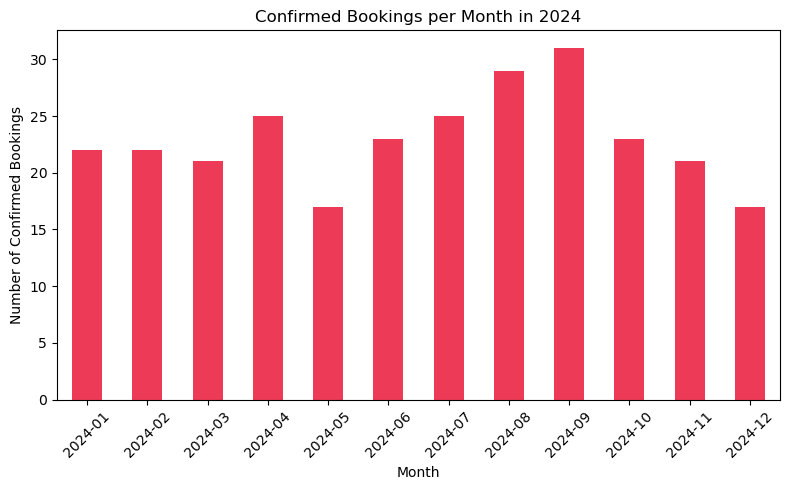

In [42]:

confirmed_2024 = df[
    (df['booking_status'] == 'Confirmed') & 
    (df['booking_date'].dt.year == 2024)
]


monthly_trend_2024 = confirmed_2024.groupby(df['booking_date'].dt.to_period('M')).size()

import matplotlib.pyplot as plt
monthly_trend_2024.plot(kind='bar', color='#ED3A56', figsize=(8,5))

plt.title("Confirmed Bookings per Month in 2024")
plt.xlabel("Month")
plt.ylabel("Number of Confirmed Bookings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [46]:
confirmed_df = df[df['booking_status'] == 'Confirmed']
confirmed_count = confirmed_df.groupby('referral_source')['booking_id'].count().reset_index(name='confirmed_bookings_count')
avg_rent = confirmed_df.groupby('referral_source')['monthly_rent_usd'].mean().reset_index(name='average_rent_usd')
result = pd.merge(confirmed_count, avg_rent, on='referral_source')
result

,referral_source,confirmed_bookings_count,average_rent_usd
0,Google,112,1357.863214
1,Instagram,132,1172.913561
2,Other,135,1205.477704
3,Referral,143,1258.913077
